In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

In [3]:
df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered.csv")

## Baseline model for RecSys 1 - Cosine Similarity

In [4]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",aktivitasluarruangan cocokuntukpasangan harg...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",spadankebugaran kursusdansanggar hiburandanpe...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",aktivitasluarruangan,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [5]:
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

In [6]:
cv.get_feature_names()

['acara',
 'aktivitasluarruangan',
 'bagussaathujan',
 'berjiwapetualang',
 'cocokuntukanakanak',
 'cocokuntukkelompokbesar',
 'cocokuntukpasangan',
 'cocokuntukpenggemaraktivitasekstrem',
 'hargaterjangkau',
 'hiburandanpermainan',
 'hiburanmalam',
 'kasinodanperjudian',
 'kebunbinatangdanakuarium',
 'konserdanpertunjukan',
 'kursusdansanggar',
 'lokasibulanmadu',
 'makanandanminuman',
 'masukgratis',
 'museum',
 'pemandangandantengara',
 'spadankebugaran',
 'tamanairdantamanhiburan',
 'tempatbelanja',
 'tempatyangbelumpopuler',
 'wisataalamdantaman']

In [7]:
cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names(),index=df1['Travel Destination'])
cv_df

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,lokasibulanmadu,makanandanminuman,masukgratis,museum,pemandangandantengara,spadankebugaran,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,wisataalamdantaman
Travel Destination,,,,,,,,,,,,,,,,,,,,,
Bintan,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Seminyak,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Bali,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ubud,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Jakarta,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toyapakeh,0,1,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Singakerta,0,1,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
Guwang,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [8]:
cos_sin = cosine_similarity(cv_result)

In [11]:
def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    for j in recomm_id[0:10]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])


    return recomm_data
    

In [12]:
get_recomendation("Riau Archipelago")

['Bintan',
 'Jawa Tengah',
 'Jakarta',
 'Kuta',
 'Bintan Regency',
 'Yogyakarta',
 'Nusa Dua',
 'Bandung',
 'Batam']

## Baseline Model for Recsys 2

In [33]:
df2=pd.read_csv("dataset_recsys2_engineered.csv")

In [34]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12410,Taman Mumbul - Sangeh,Sangeh,Taman Mumbul,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,10.0
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,tempatbelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0


In [35]:
def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, info, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'sumberinformasiwisatawan':info,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

In [36]:
user_data=userdata(0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1)

In [37]:
user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

In [38]:
user_type

'aktivitasluarruangan berjiwapetualang cocokuntukpenggemaraktivitasekstrem hiburanmalam kasinodanperjudian pemandangandantengara wisataalamdantaman '

In [39]:
user_data={"Spot/Vendor":"user",
           "Type": user_type}

In [40]:
df2=df2.append(user_data, ignore_index=True)

In [41]:
df2

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0
...,...,...,...,...,...,...
12411,Sangeh Traditional Village - Tur Harian - Sangeh,Sangeh,Sangeh Traditional Village - Tur Harian,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...,4.0
12412,Pande Made Sutata - Sangeh,Sangeh,Pande Made Sutata,tempatbelanja,https://www.tripadvisor.co.id/Attraction_Revie...,NaN
12413,Sangeh Monkey Forest - Sangeh,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,404.0
12414,Beji Guwang Hidden Canyon - Guwang,Guwang,Beji Guwang Hidden Canyon,wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.co.id/Attraction_Revie...,323.0


In [42]:
cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

In [43]:
cv_spot.get_feature_names()

['acara',
 'aktivitasluarruangan',
 'bagussaathujan',
 'berjiwapetualang',
 'cocokuntukanakanak',
 'cocokuntukkelompokbesar',
 'cocokuntukpasangan',
 'cocokuntukpenggemaraktivitasekstrem',
 'hargaterjangkau',
 'hiburandanpermainan',
 'hiburanmalam',
 'kasinodanperjudian',
 'kebunbinatangdanakuarium',
 'konserdanpertunjukan',
 'kursusdansanggar',
 'lokasibulanmadu',
 'makanandanminuman',
 'masukgratis',
 'museum',
 'pemandangandantengara',
 'spadankebugaran',
 'tamanairdantamanhiburan',
 'tempatbelanja',
 'tempatyangbelumpopuler',
 'wisataalamdantaman']

In [45]:
cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names(),index=df2['Spot/Vendor'])
cv_df_spot

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,lokasibulanmadu,makanandanminuman,masukgratis,museum,pemandangandantengara,spadankebugaran,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,wisataalamdantaman
Spot/Vendor,,,,,,,,,,,,,,,,,,,,,
Klub Golf Ria Bintan - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Adventures Flying Club Bintan - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pantai Trikora - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bintan Taxi (民丹岛出租车服务） - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Klub Golf Bintan Lagoon Resort - Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sangeh Traditional Village - Tur Harian - Sangeh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Pande Made Sutata - Sangeh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Sangeh Monkey Forest - Sangeh,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [46]:
cos_sin_spot = cosine_similarity(cv_spot_result)

In [49]:
def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot/Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
    destination_combined=[]
    spot_combined=[]
    activity_combined=[]
    link_combined=[]

    for i in get_recomendation(place):
    #     recom_destination=[]
        spot_per_destination=0
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
                    destination_combined.append(df2.loc[j]["Travel Destination"])
                    spot_combined.append(df2.loc[j]["Spot/Vendor"])
                    activity_combined.append(df2.loc[j]["Type"])
                    link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
    
    recom=pd.DataFrame()
    recom["Destination"]=destination_combined
    recom["Spot"]=spot_combined
    recom["Type of Activity"]=activity_combined
    recom["Link"]=link_combined

    return recom

In [50]:
get_recomendation_spot("Riau Archipelago")

,Destination,Spot,Type of Activity,Link
0,Bintan,Gunung Bintan - Bintan,wisataalamdantaman berjiwapetualang,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Pulau Basing - Bintan,pemandangandantengara wisataalamdantaman,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,BindoTravel - Bintan,aktivitasluarruangan hiburanmalam makanandanmi...,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Mini Zoo Kota Kijang - Bintan,aktivitasluarruangan wisataalamdantaman kebunb...,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Cafe Tempo Bintan - Bintan,hiburanmalam,https://www.tripadvisor.co.id/Attraction_Revie...
5,Jawa Tengah,Gunung Sindoro - Sumbing - Jawa Tengah,wisataalamdantaman cocokuntukkelompokbesar coc...,https://www.tripadvisor.co.id/Attraction_Revie...
6,Jawa Tengah,Grojogan Sewu - Jawa Tengah,wisataalamdantaman cocokuntukpenggemaraktivita...,https://www.tripadvisor.co.id/Attraction_Revie...
7,Jawa Tengah,Curug Lawe - Jawa Tengah,wisataalamdantaman cocokuntukpenggemaraktivita...,https://www.tripadvisor.co.id/Attraction_Revie...
8,Jawa Tengah,Kawah Sikidang - Jawa Tengah,wisataalamdantaman berjiwapetualang,https://www.tripadvisor.co.id/Attraction_Revie...
9,Jawa Tengah,Gunung Prau - Jawa Tengah,wisataalamdantaman cocokuntukkelompokbesar coc...,https://www.tripadvisor.co.id/Attraction_Revie...


### Combination Recsys_1 and Recsys_2

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered.csv")

## Baseline model for RecSys 1 - Cosine Similarity
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

cv.get_feature_names()

cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names(),index=df1['Travel Destination'])
cv_df

cos_sin = cosine_similarity(cv_result)

def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    hotel_price=[]
    hotel_link=[]
    flight_price=[]
    flight_link=[]
    for j in recomm_id[0:6]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])
            hotel_price.append(df1.loc[j]["Hotel Best Deal"])
            hotel_link.append(df1.loc[j]["Hotel Link"])
            flight_price.append(df1.loc[j]["Flight Best Deal"])
            flight_link.append(df1.loc[j]["Hotel Link"])


    return recomm_data

## Baseline Model for Recsys 2

def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, info, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'sumberinformasiwisatawan':info,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

user_data=userdata(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

user_data={"Spot / Vendor":"user",
           "Type": user_type}

df2=df2.append(user_data, ignore_index=True)

cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

cv_spot.get_feature_names()

cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names(),index=df2['Spot / Vendor'])
cv_df_spot

cos_sin_spot = cosine_similarity(cv_spot_result)

def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot / Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
#     destination_combined=[]
#     spot_combined=[]
#     activity_combined=[]
#     link_combined=[]
    recom_destination=[]
    spot_in_destination=[]
    link_spot=[]
    recom_hotel_best=[]
    recom_hotel_link=[]
    recom_flight_best=[]
    recom_flight_link=[]
    
    for i in get_recomendation(place):
        recom_destination.append(i)
#         recom_hotel_best.append()
#         print("\nYou might also like exploring:",i)
#         print(df1[df1["Travel Destination"]==i]["Hotel Best Deal"])
#         print(f"Spots you might like in {i}")
        spot_per_destination=0
        recom_spot=[]
        recom_spot_link=[]
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
#                     print(df2.loc[j]["Spot / Vendor"])
                    recom_spot.append(df2.loc[j]["Spot / Vendor"])
                    recom_spot_link.append(df2.loc[j]["Link"])
#                     destination_combined.append(df2.loc[j]["Travel Destination"])
#                     spot_combined.append(df2.loc[j]["Spot / Vendor"])
#                     activity_combined.append(df2.loc[j]["Type"])
#                     link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
        spot_in_destination.append(recom_spot)
        link_spot.append(recom_spot_link)
        recom_hotel_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Best Deal"])
        recom_hotel_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Link"])
        recom_flight_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Best Deal"])
        recom_flight_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Link"])
    
#     recom=pd.DataFrame()
#     recom["Destination"]=destination_combined
#     recom["Spot"]=spot_combined
#     recom["Type of Activity"]=activity_combined
#     recom["Link"]=link_combined
#     for i in range(len(destination_combined)):
#         print(destination_combined[i], spot_combined[i])

    return recom_destination, spot_in_destination, link_spot, recom_hotel_best, recom_hotel_link, recom_flight_best, recom_flight_link

a,b,c,d,e,f,g=get_recomendation_spot("Ambon")

In [28]:
df1[df1['Travel Destination'] == "Babakan Madang"].index[0]

275

In [193]:
df_result=pd.DataFrame()
df_result["Destination"]=a
df_result["Hotel"]=d
df_result["Flight"]=f

In [194]:
df_result["Hotel"]=3*df_result["Hotel"]
df_result["Total"]=df_result["Hotel"]+df_result["Flight"]

In [195]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Destination  5 non-null      object
 1   Hotel        5 non-null      int64 
 2   Flight       5 non-null      int64 
 3   Total        5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [198]:
df_result

,Destination,Hotel,Flight,Total
0,Tanjung Pandan,688443,813200,1501643
1,Kintamani,1200000,1305700,2505700
2,Bedugul,630000,1356356,1986356
3,Rantepao,1058802,3039298,4098100
4,Sidoarjo,894000,1373152,2267152


In [196]:
df_hotelprice=df_result[["Destination","Hotel"]]
df_hotelprice["Price_Type"]="Hotel Best Deal"
df_hotelprice=df_hotelprice.rename(columns={"Hotel":"Price"})

df_flightprice=df_result[["Destination","Flight"]]
df_flightprice["Price_Type"]="Flight Best Deal"
df_flightprice=df_flightprice.rename(columns={"Flight":"Price"})

df_total=df_result[["Destination","Total"]]
df_total["Price_Type"]="Appx. Budget"
df_total=df_total.rename(columns={"Total":"Price"})

df_viz=pd.concat([df_hotelprice,df_flightprice,df_total])

C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

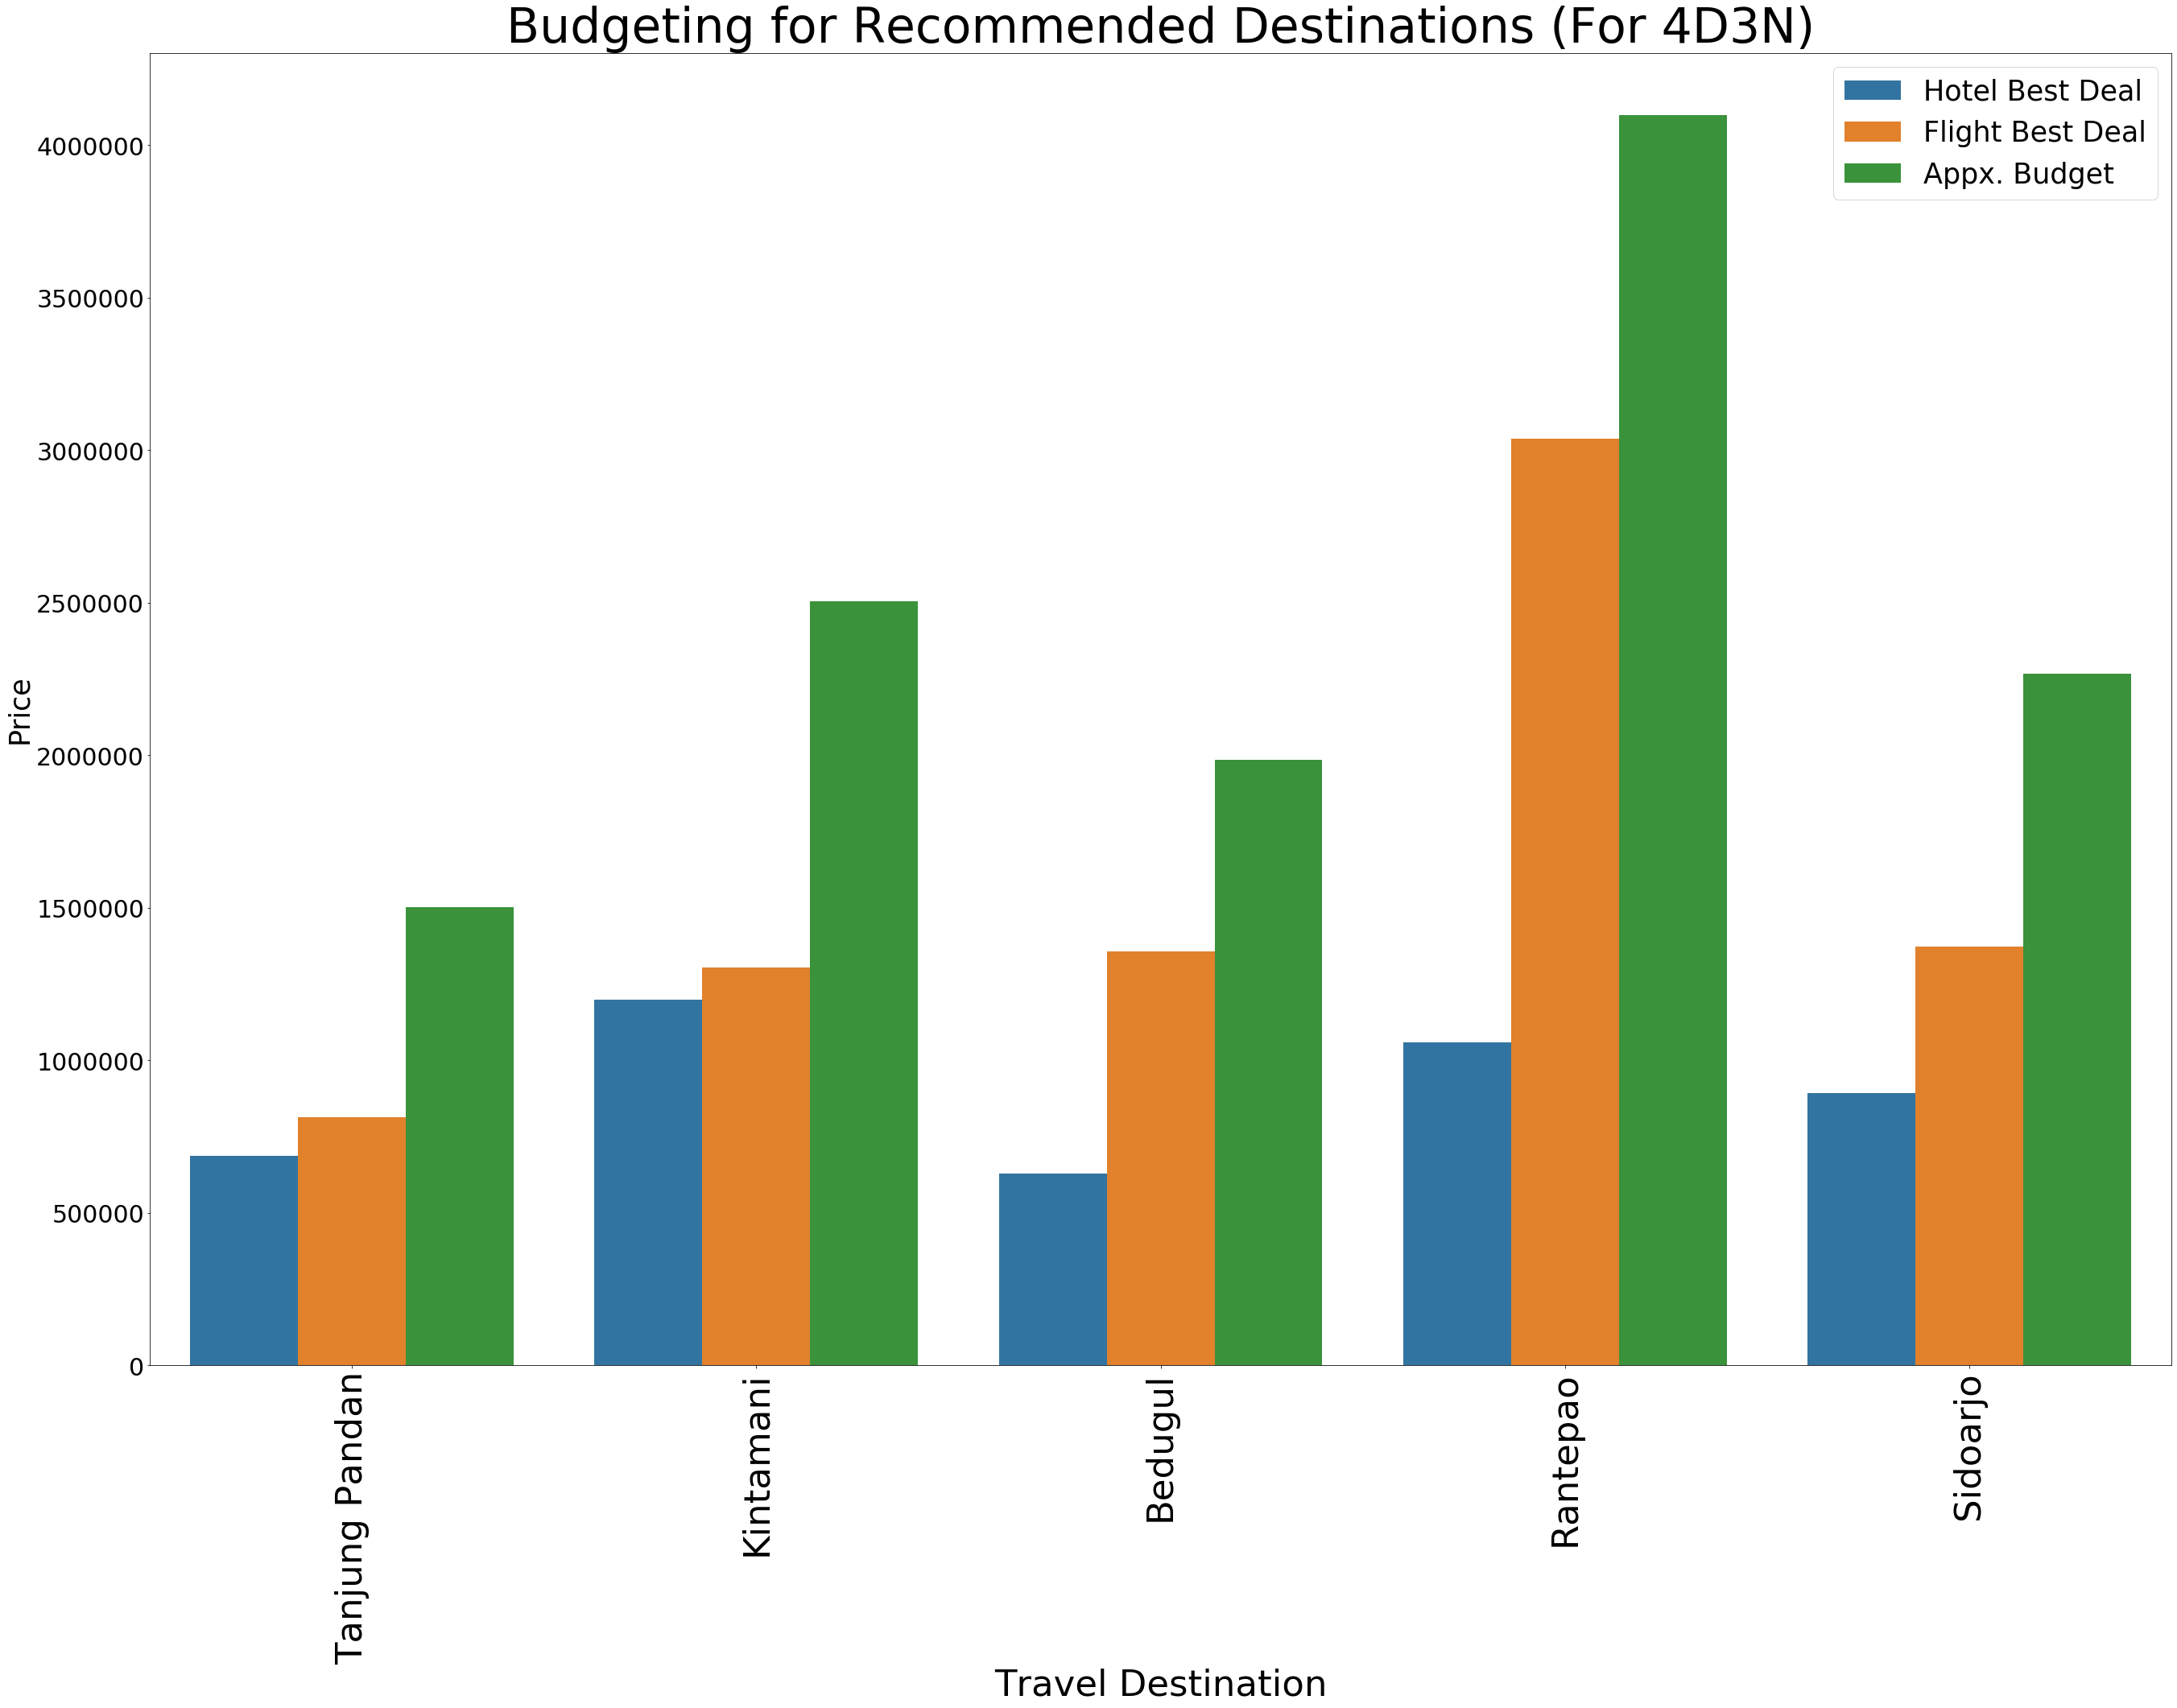

In [200]:
import matplotlib
fig=plt.figure(figsize=(45,30))
# plt.font
sns.barplot(x="Destination",y="Price", hue="Price_Type", data=df_viz)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=45)
matplotlib.rc("ytick",labelsize=45)
plt.xlabel('Travel Destination',fontsize=45)
plt.ylabel('Price',fontsize=35)
plt.legend(fontsize=35)
plt.title("Budgeting for Recommended Destinations (For 4D3N)", fontsize=60)
fig.savefig("budget_destination.png")


In [10]:
a

['Tanjung Pandan', 'Kintamani', 'Bedugul', 'Rantepao', 'Sidoarjo']

In [23]:
b

[['Embryos Nursery',
  'Danau Bratan',
  'Tegal Sari Bali Coffee',
  'Abandoned Bedugul Hotel',
  'Balisuperreisen'],
 ['Klenteng Banda Neira',
  'Gunung Banda Api',
  'Rumah Budaya Banda Neira',
  'Naira Dive',
  'Dive BlueMotion'],
 ['Bukit Masbait',
  'Kei Pirate Divers',
  'Pemandian Evu',
  'Pantai Ohoililir',
  'Pulau Baeer'],
 ['Paralayang Kemuning',
  'Air Terjun Parang Ijo',
  'Puri Taman Saraswati',
  'Grojogan Sewu',
  'Air Terjun Jumog'],
 ['Tasikoki Wildlife Rescue Center',
  'Tangkoko Wildlife Tour',
  'YOS Dive Lembeh-Eco Beach Resort',
  'Tangkoko Ranger',
  'Ekowisata Pasir Panjang Pantai Kahona']]

In [147]:
c

[['https://www.tripadvisor.co.id/Attraction_Review-g608478-d17321531-Reviews-Pyramid_Congkang_Reef-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d6515924-Reviews-Jemeluk_Beach-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g2528747-d9697351-Reviews-Lipah_Beach-Bunutan_Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d3354636-Reviews-Apneista-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d17433407-Reviews-MIMIJUL_TEAM-Amed_Abang_Karangasem_Bali.html'],
 ['https://www.tripadvisor.co.id/Attraction_Review-g608487-d379154-Reviews-Legian_Beach-Legian_Kuta_District_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608487-d1635025-Reviews-Jalan_Legian-Legian_Kuta_District_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608487-d6956343-Reviews-DMZ_Bali_3D_Art_Museum-Legian_Kuta_District_Bali.

In [148]:
d

[495000.0, 2360331.0, 788500.0, 744245.0, 515702.0]

In [149]:
e

['https://www.tripadvisor.co.id/Hotels-g608478-Amed_Abang_Karangasem_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g608487-Legian_Kuta_District_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g562690-Tuban_Kuta_Kuta_District_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g608484-Karangasem_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g2301800-Central_Kalimantan_Kalimantan-Hotels.html']

In [151]:
f

['Rp 1.145.870',
 'Rp 1.305.700',
 'Rp 1.305.700',
 'Rp 1.145.870',
 'Rp 3.055.602']

In [35]:
df1[df1["Travel Destination"]=="Karangasem"]["Hotel Best Deal"].values

array([744245.])

### Data Analysis and Visualization

In [52]:
df1.head()

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358


In [53]:
df2.head()

,Spot/Vendor,Travel Destination,Spot / Vendor Name,Type,Link,Review Count
0,Klub Golf Ria Bintan - Bintan,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0
1,Air Adventures Flying Club Bintan - Bintan,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0
2,Pantai Trikora - Bintan,Bintan,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0
3,Bintan Taxi (民丹岛出租车服务） - Bintan,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0
4,Klub Golf Bintan Lagoon Resort - Bintan,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0


In [63]:
df3=df1.merge(df2, on="Travel Destination")

In [64]:
df3.columns

Index(['Country Name', 'Travel Destination', 'Location', 'Things to Do',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_x', 'Spot/Vendor', 'Spot / Vendor Name', 'Type', 'Link',
       'Review Count_y'],
      dtype='object')

In [65]:
df3=df3.rename(columns={'Things to Do':"Destination Type",
       'Review Count_x': "Review Count_Destination",
                    'Type':"Spot/Vendor Type", 
                        "Link":"Spot/Vendor Link",
       'Review Count_y':"Review Count_Spot/Vendor"})

In [73]:
df3.to_csv("dataset_summary.csv",index=False)

In [66]:
df3.columns

Index(['Country Name', 'Travel Destination', 'Location', 'Destination Type',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_Destination', 'Spot/Vendor', 'Spot / Vendor Name',
       'Spot/Vendor Type', 'Spot/Vendor Link', 'Review Count_Spot/Vendor'],
      dtype='object')

In [70]:
df3=df3[['Spot / Vendor Name',
       'Spot/Vendor Type', 'Spot/Vendor Link', 'Review Count_Spot/Vendor','Travel Destination', 'Location', 'Destination Type',
       'Hotel Link', 'Hotel Best Deal', 'Flight Link', 'Flight Best Deal',
       'Review Count_Destination']]

In [71]:
df3.describe()

,Review Count_Spot/Vendor,Hotel Best Deal,Flight Best Deal,Review Count_Destination
count,12333.000000,1.241500e+04,1.241500e+04,1.241500e+04
mean,150.202141,1.044581e+06,1.413173e+06,2.261185e+05
std,777.702802,1.449286e+06,1.066188e+06,5.294988e+05
min,0.000000,1.063130e+05,0.000000e+00,1.040000e+02
25%,3.000000,3.673100e+05,1.096600e+06,9.150000e+03
50%,17.000000,6.561900e+05,1.201700e+06,5.622200e+04
75%,86.000000,1.238194e+06,1.358600e+06,1.891700e+05
max,34864.000000,1.593223e+07,9.152495e+06,2.998882e+06


In [74]:
df3.head()

,Spot / Vendor Name,Spot/Vendor Type,Spot/Vendor Link,Review Count_Spot/Vendor,Travel Destination,Location,Destination Type,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count_Destination
0,Klub Golf Ria Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,249.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Air Adventures Flying Club Bintan,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,64.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
2,Pantai Trikora,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,125.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
3,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,32.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
4,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...,148.0,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
IQR=df1["Review Count"].describe()["75%"]-df1["Review Count"].describe()["25%"]
maxim=df1["Review Count"].describe()["75%"]+IQR
minim=df1["Review Count"].describe()["25%"]-IQR

In [81]:
df_pop=df1[df1["Review Count"]>maxim]

In [82]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 310
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        60 non-null     object
 1   Travel Destination  60 non-null     object
 2   Location            60 non-null     object
 3   Things to Do        60 non-null     object
 4   Hotel Link          60 non-null     object
 5   Hotel Best Deal     60 non-null     int64 
 6   Flight Link         60 non-null     object
 7   Flight Best Deal    60 non-null     int64 
 8   Review Count        60 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ KB


In [89]:
df_pop.sort_values(by="Review Count")

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
310,Indonesia,Bangli,"Bali, Indonesia",aktivitasluarruangan pemandangandantengara w...,https://www.tripadvisor.co.id/Hotels-g1025506-...,400000,https://www.tripadvisor.co.id/Flights-g1025506...,1145870,18026
62,Indonesia,Manado,"Sulawesi Utara, Indonesia",aktivitasluarruangan wisataalamdantaman pema...,https://www.tripadvisor.co.id/Hotels-g297721-M...,485100,https://www.tripadvisor.co.id/Flights-g297721-...,2161400,18926
21,Indonesia,Uluwatu,"Bali, Indonesia",aktivitasluarruangan spadankebugaran kursus...,https://www.tripadvisor.co.id/Hotels-g8366411-...,8153000,https://www.tripadvisor.co.id/Flights-g8366411...,1305700,19396
37,Indonesia,Ungasan,"Semenanjung Nusa Dua, Indonesia",aktivitasluarruangan spadankebugaran wisataal...,https://www.tripadvisor.co.id/Hotels-g1219108-...,1749174,https://www.tripadvisor.co.id/Flights-g1219108...,1305700,20054
53,Indonesia,Tuban,"Kuta, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g562690-T...,788500,https://www.tripadvisor.co.id/Flights-g562690-...,1305700,20552
55,Indonesia,Tabanan,"Bali, Indonesia",aktivitasluarruangan wisataalamdantaman peman...,https://www.tripadvisor.co.id/Hotels-g608496-T...,818182,https://www.tripadvisor.co.id/Flights-g608496-...,1305700,21625
54,Indonesia,Pemuteran,"Gerokgak, Indonesia",aktivitasluarruangan spadankebugaran wisata...,https://www.tripadvisor.co.id/Hotels-g608493-P...,130165,https://www.tripadvisor.co.id/Flights-g608493-...,1145870,22705
30,Indonesia,Nusa Penida,"Bali, Indonesia",aktivitasluarruangan wisataalamdantaman pem...,https://www.tripadvisor.co.id/Hotels-g2538506-...,500776,https://www.tripadvisor.co.id/Flights-g2538506...,1145870,24938
33,Indonesia,Pantai Lovina,"Buleleng, Indonesia",aktivitasluarruangan spadankebugaran kursus...,https://www.tripadvisor.co.id/Hotels-g1599559-...,1655215,https://www.tripadvisor.co.id/Flights-g1599559...,1145870,24948
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006


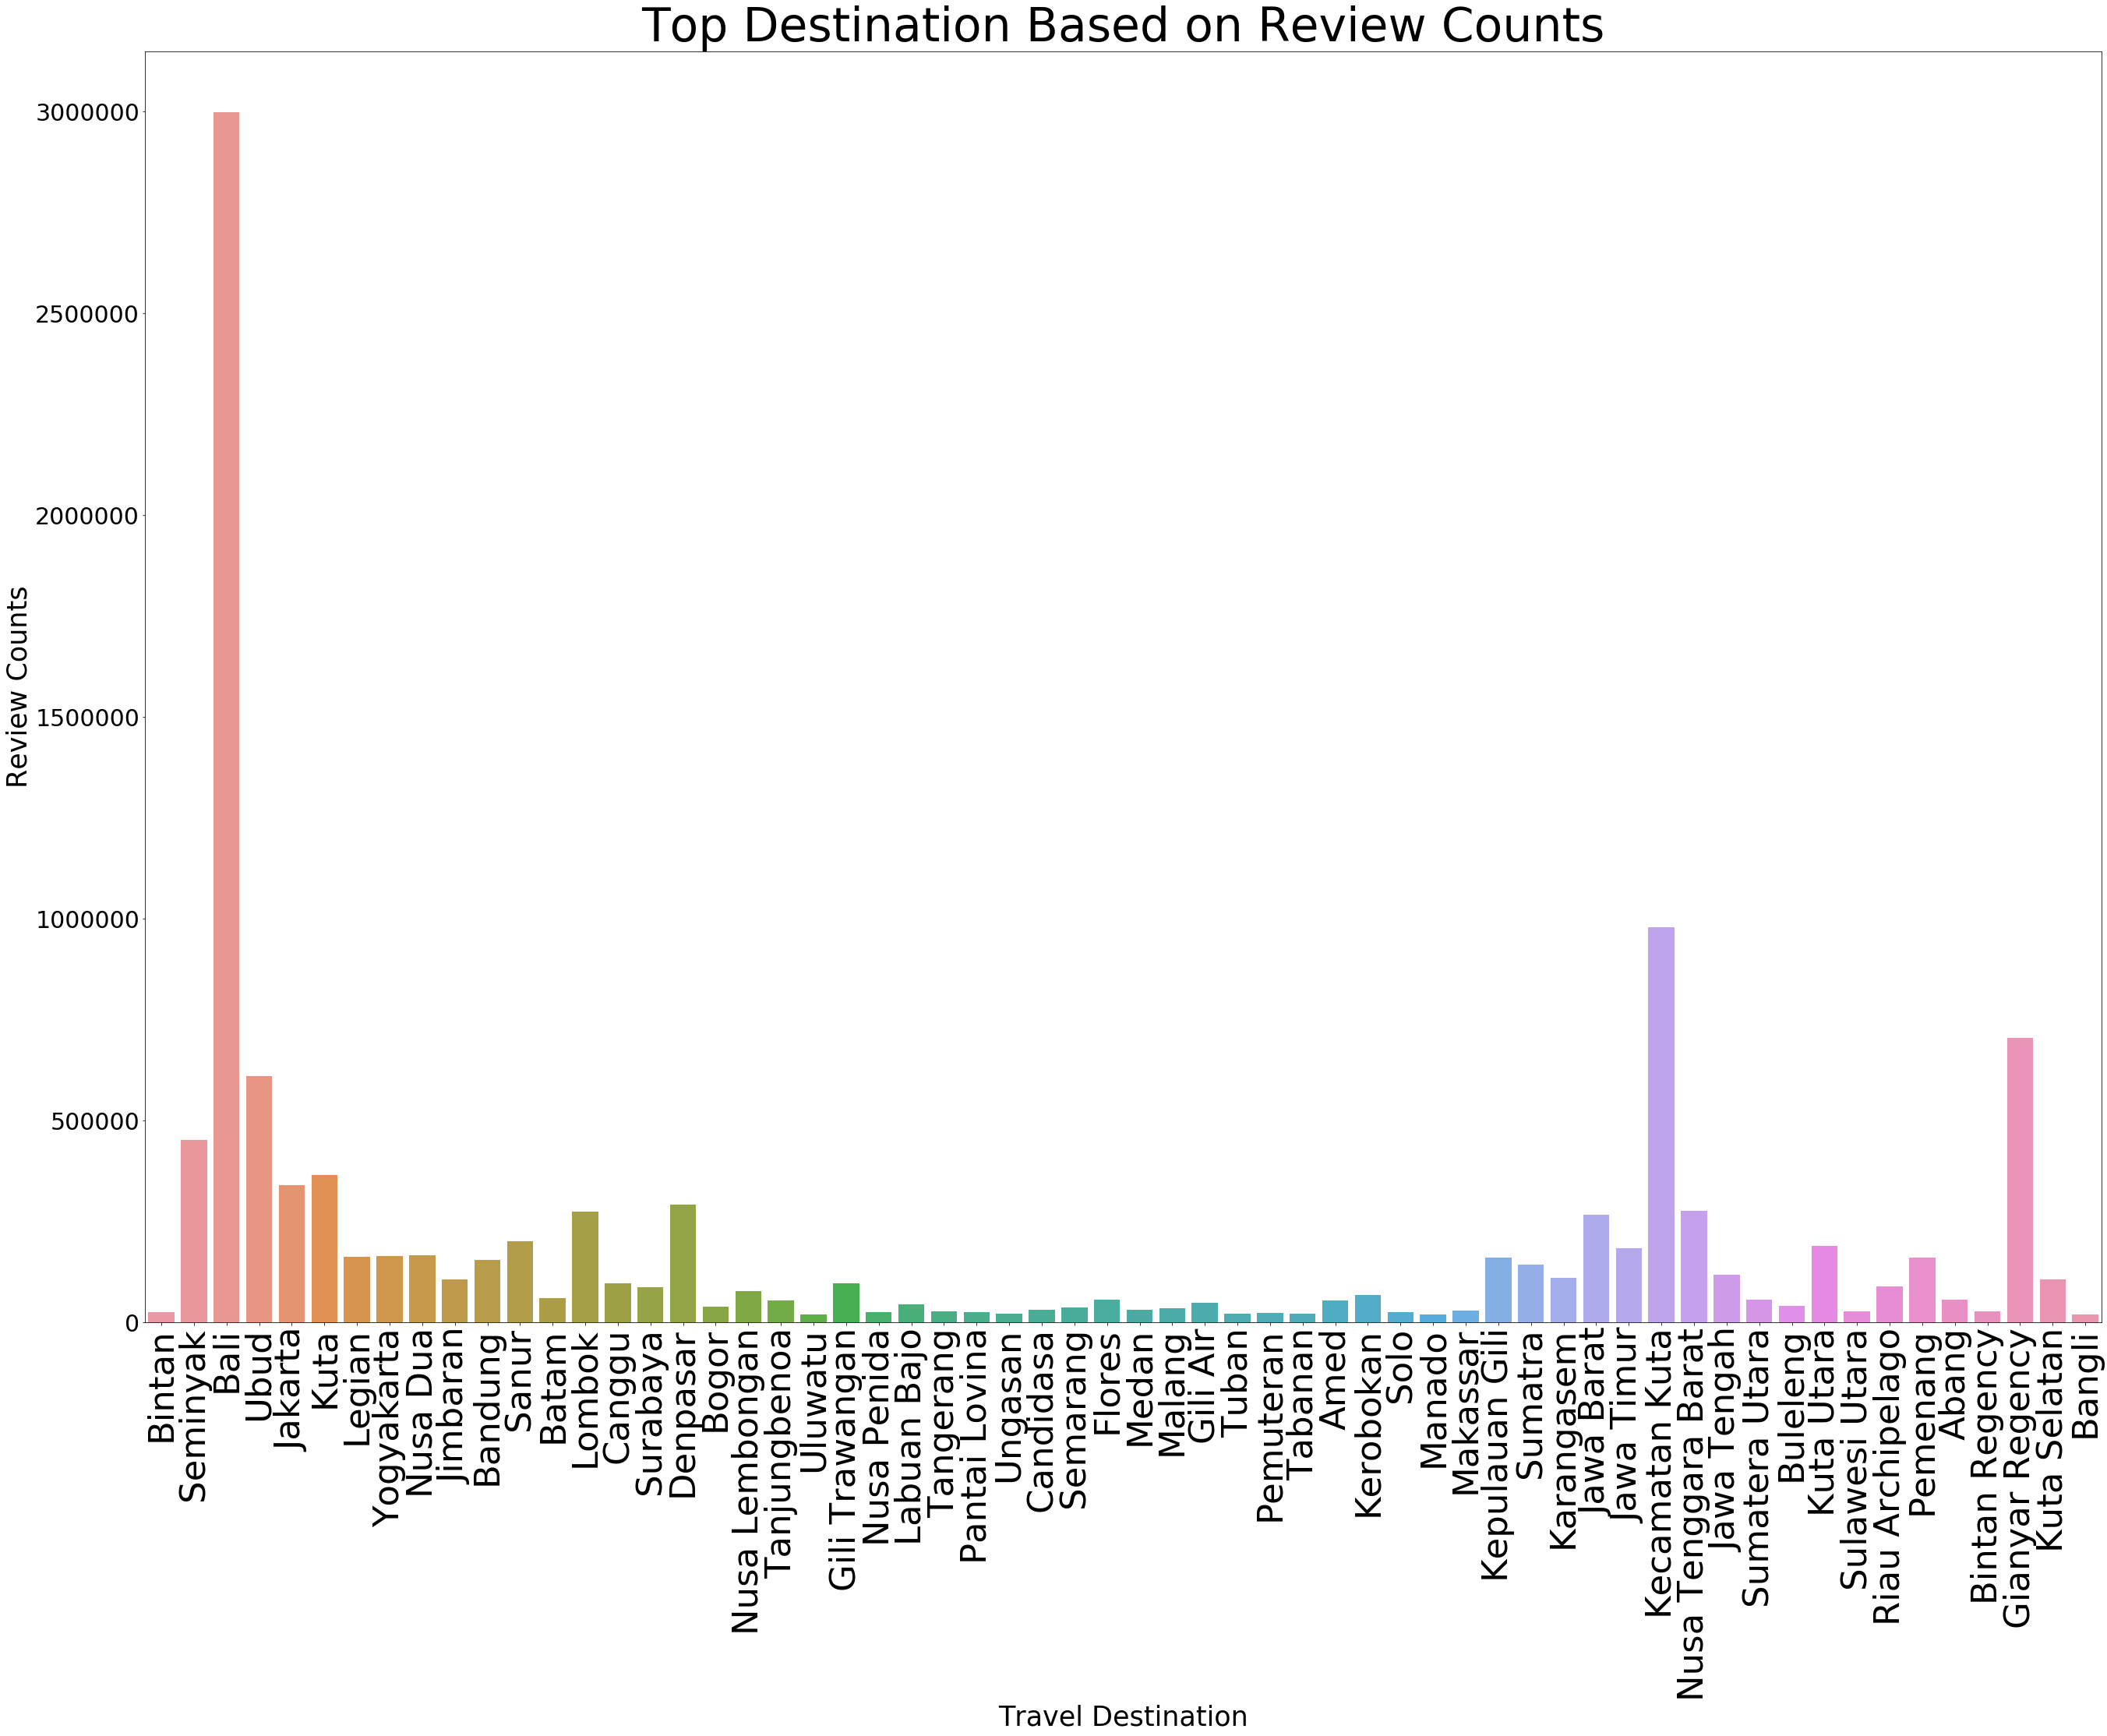

In [155]:
import matplotlib
fig=plt.figure(figsize=(45,30))
sns.barplot(x="Travel Destination", y="Review Count", data=df_pop)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=45)
matplotlib.rc("ytick",labelsize=45)
plt.xlabel('Travel Destination',fontsize=35)
plt.ylabel('Review Counts',fontsize=35)
plt.title("Top Destination Based on Review Counts", fontsize=60)
fig.savefig("topdestination.png")

In [96]:
df1

,Country Name,Travel Destination,Location,Things to Do,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Review Count
0,Indonesia,Bintan,"Bintan Regency, Indonesia",aktivitasluarruangan pemandangandantengara ...,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182,https://www.tripadvisor.co.id/Flights-g297718-...,1048200,25006
1,Indonesia,Seminyak,"Kecamatan Kuta, Indonesia",spadankebugaran aktivitasluarruangan tempatbe...,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874,https://www.tripadvisor.co.id/Flights-g469404-...,1305700,451212
2,Indonesia,Bali,Indonesia,aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190,https://www.tripadvisor.co.id/Flights-g294226-...,1145870,2998882
3,Indonesia,Ubud,"Gianyar Regency, Indonesia",aktivitasluarruangan spadankebugaran tempat...,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927,https://www.tripadvisor.co.id/Flights-g297701-...,1145870,610495
4,Indonesia,Jakarta,"Jawa, Indonesia",tempatbelanja spadankebugaran aktivitasluarru...,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563,https://www.tripadvisor.co.id/Flights-g294229-...,0,339358
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,"Nusa Penida, Indonesia",aktivitasluarruangan cocokuntukpasangan harg...,https://www.tripadvisor.co.id/Hotels-g14115586...,663636,https://www.tripadvisor.co.id/Flights-g1411558...,1752927,742
316,Indonesia,Singakerta,"Ubud, Indonesia",spadankebugaran kursusdansanggar hiburandanpe...,https://www.tripadvisor.co.id/Hotels-g15880600...,661107,https://www.tripadvisor.co.id/Flights-g1588060...,1752927,2019
317,Indonesia,Guwang,"Sukawati, Indonesia",wisataalamdantaman cocokuntukpasangan hargater...,https://www.tripadvisor.com/Hotels-g19140131-G...,235636,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,343
318,Indonesia,Singapadu Kaler,"Sukawati, Indonesia",aktivitasluarruangan,https://www.tripadvisor.co.id/Hotels-g20116867...,627097,https://www.tripadvisor.co.id/Flights-g2011686...,1197735,309


In [133]:
df_top10=df_pop.sort_values(by="Review Count", ascending=False).head(10).reset_index()

In [140]:
dftop_hotelprice=df_top10[["Travel Destination","Hotel Best Deal"]]
dftop_hotelprice["Price_Type"]="Hotel Best Deal"
dftop_hotelprice=dftop_hotelprice.rename(columns={"Hotel Best Deal":"Price"})

dftop_flightprice=df_top10[["Travel Destination","Flight Best Deal"]]
dftop_flightprice["Price_Type"]="Flight Best Deal"
dftop_flightprice=dftop_flightprice.rename(columns={"Flight Best Deal":"Price"})

df_top10["Appx. Total Price"]=df_top10["Hotel Best Deal"]+df1["Flight Best Deal"]
dftop_total=df_top10[["Travel Destination","Appx. Total Price"]]
dftop_total["Price_Type"]="Appx. Total Price"
dftop_total=dftop_total.rename(columns={"Appx. Total Price":"Price"})

C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [145]:
dftop_viz=pd.concat([dftop_hotelprice,dftop_flightprice,dftop_total])

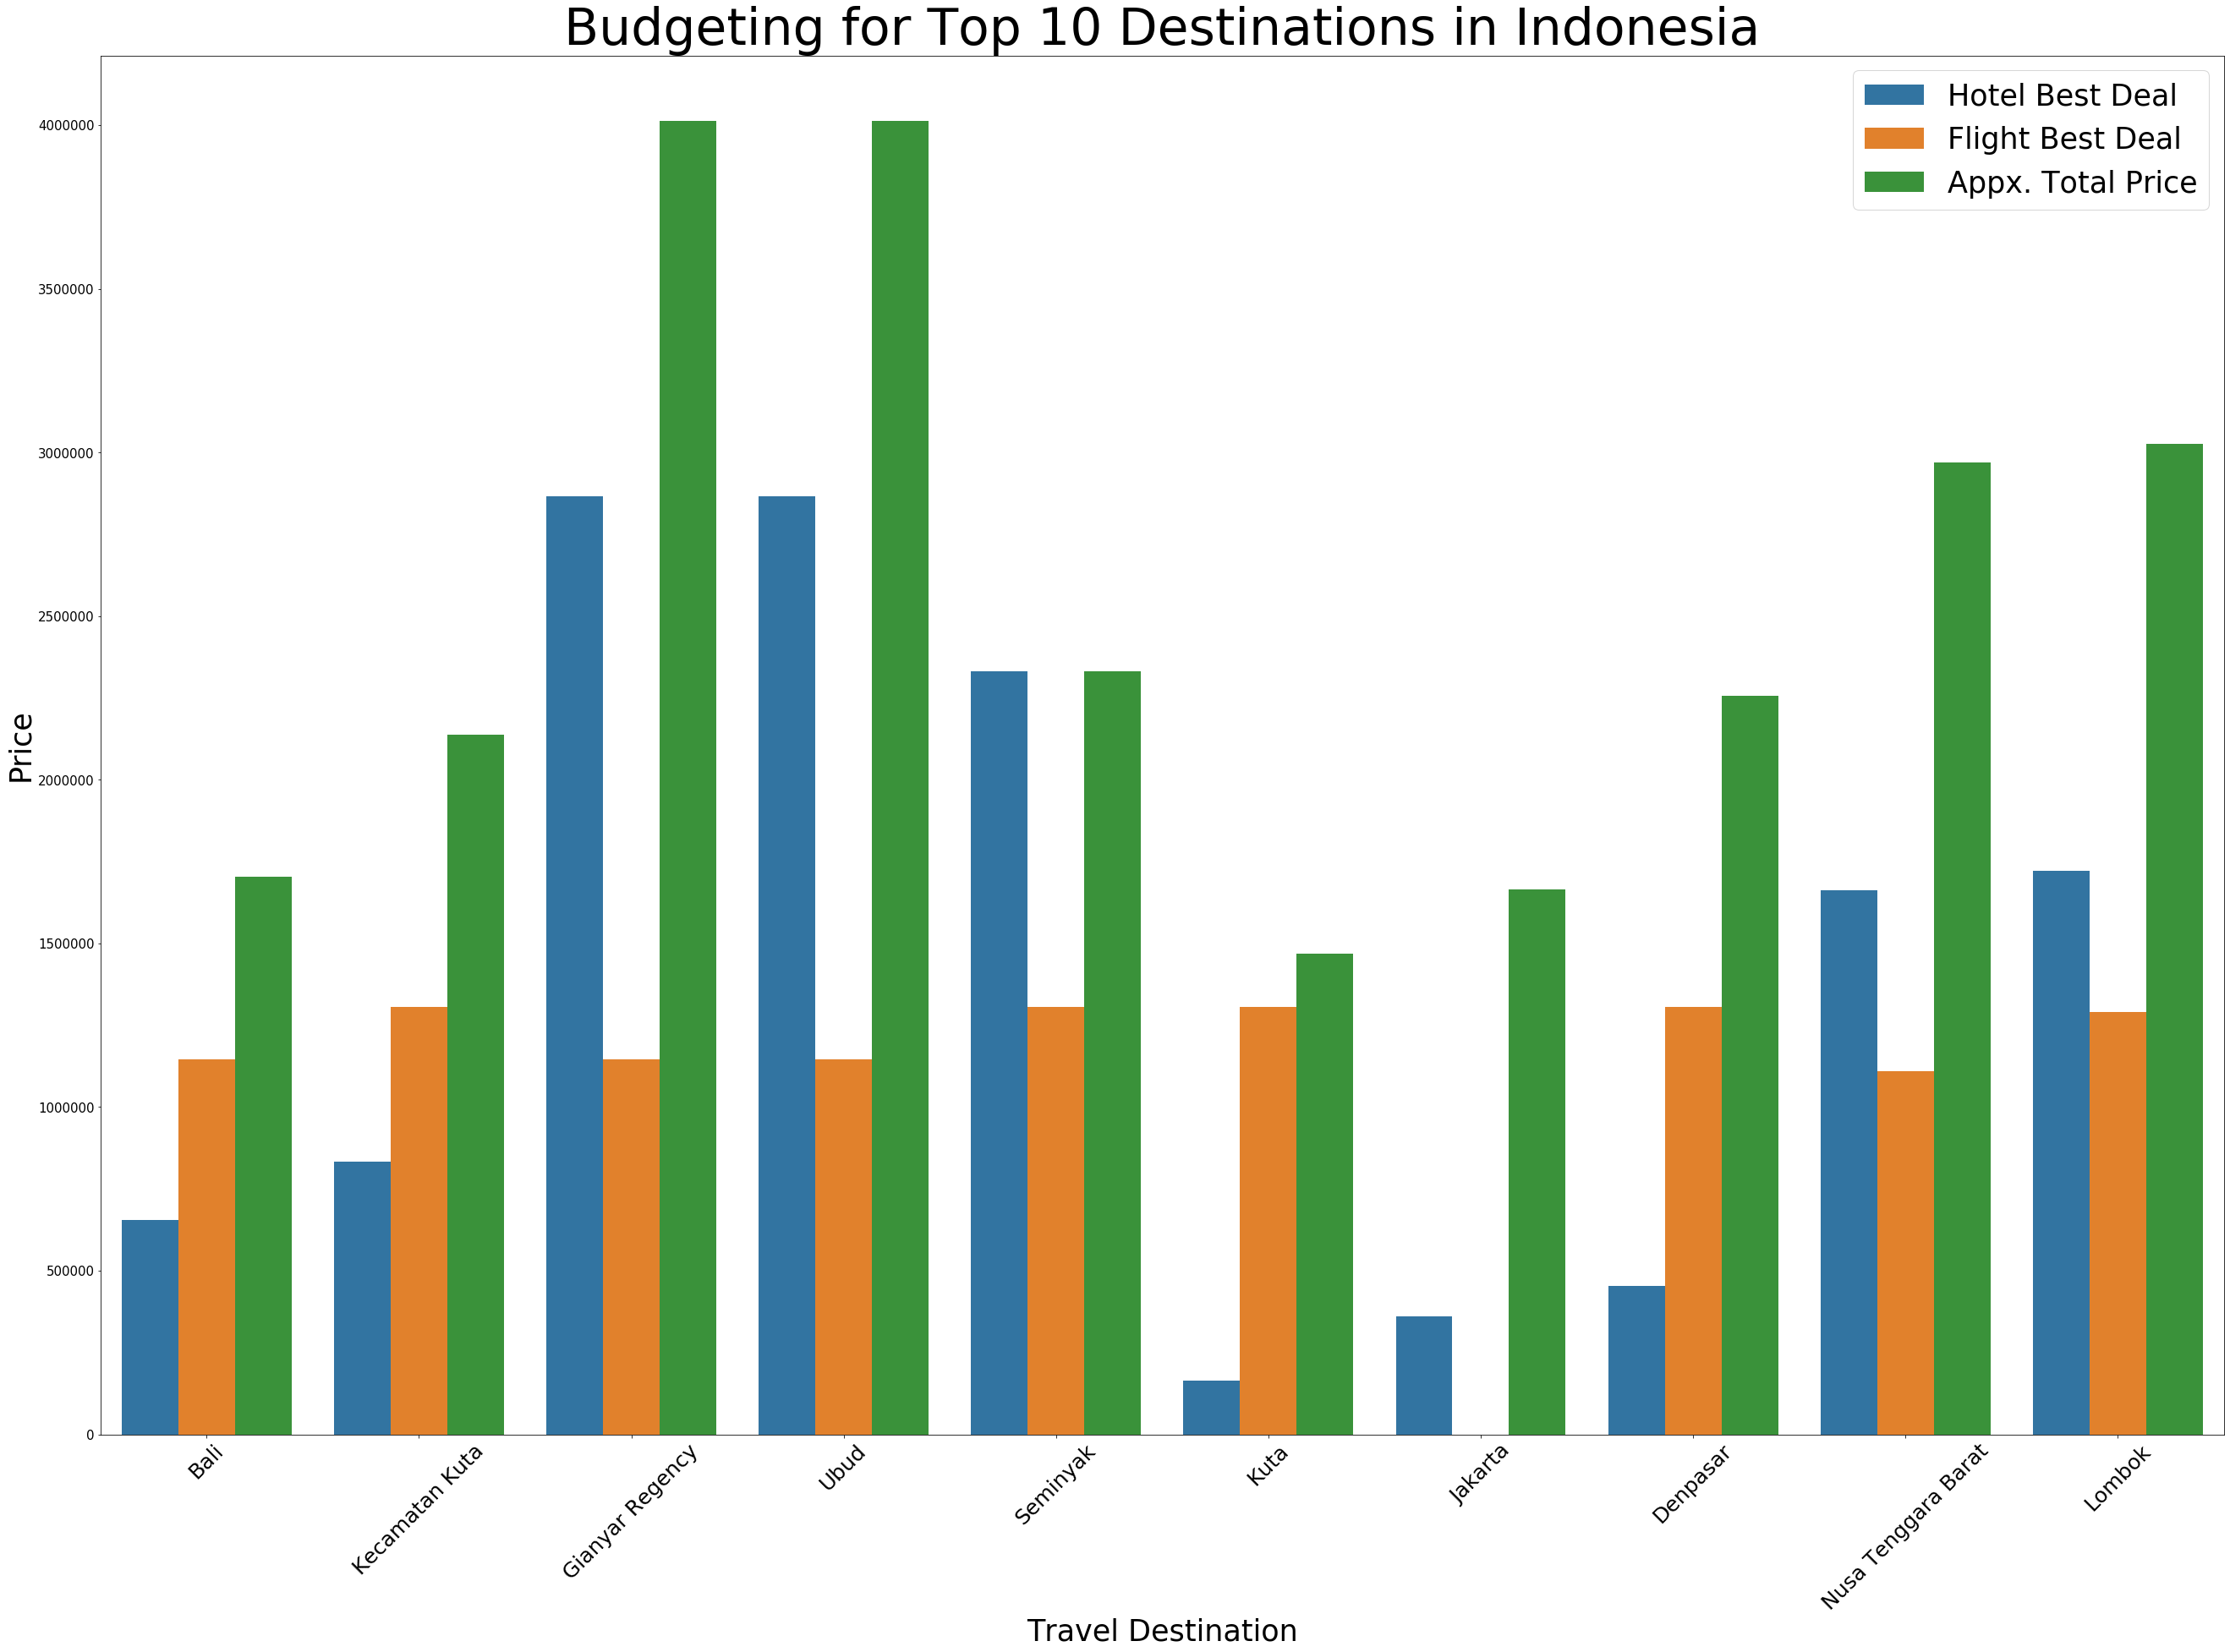

In [209]:
import matplotlib
fig=plt.figure(figsize=(45,30))
# plt.font
sns.barplot(x="Travel Destination",y="Price", hue="Price_Type", data=dftop_viz)
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
matplotlib.rc("xtick",labelsize=35)
matplotlib.rc("ytick",labelsize=35)
plt.xlabel('Travel Destination',fontsize=35)
plt.ylabel('Price',fontsize=35)
plt.legend(fontsize=35)
plt.title("Budgeting for Top 10 Destinations in Indonesia", fontsize=60)
fig.savefig("budget.png")


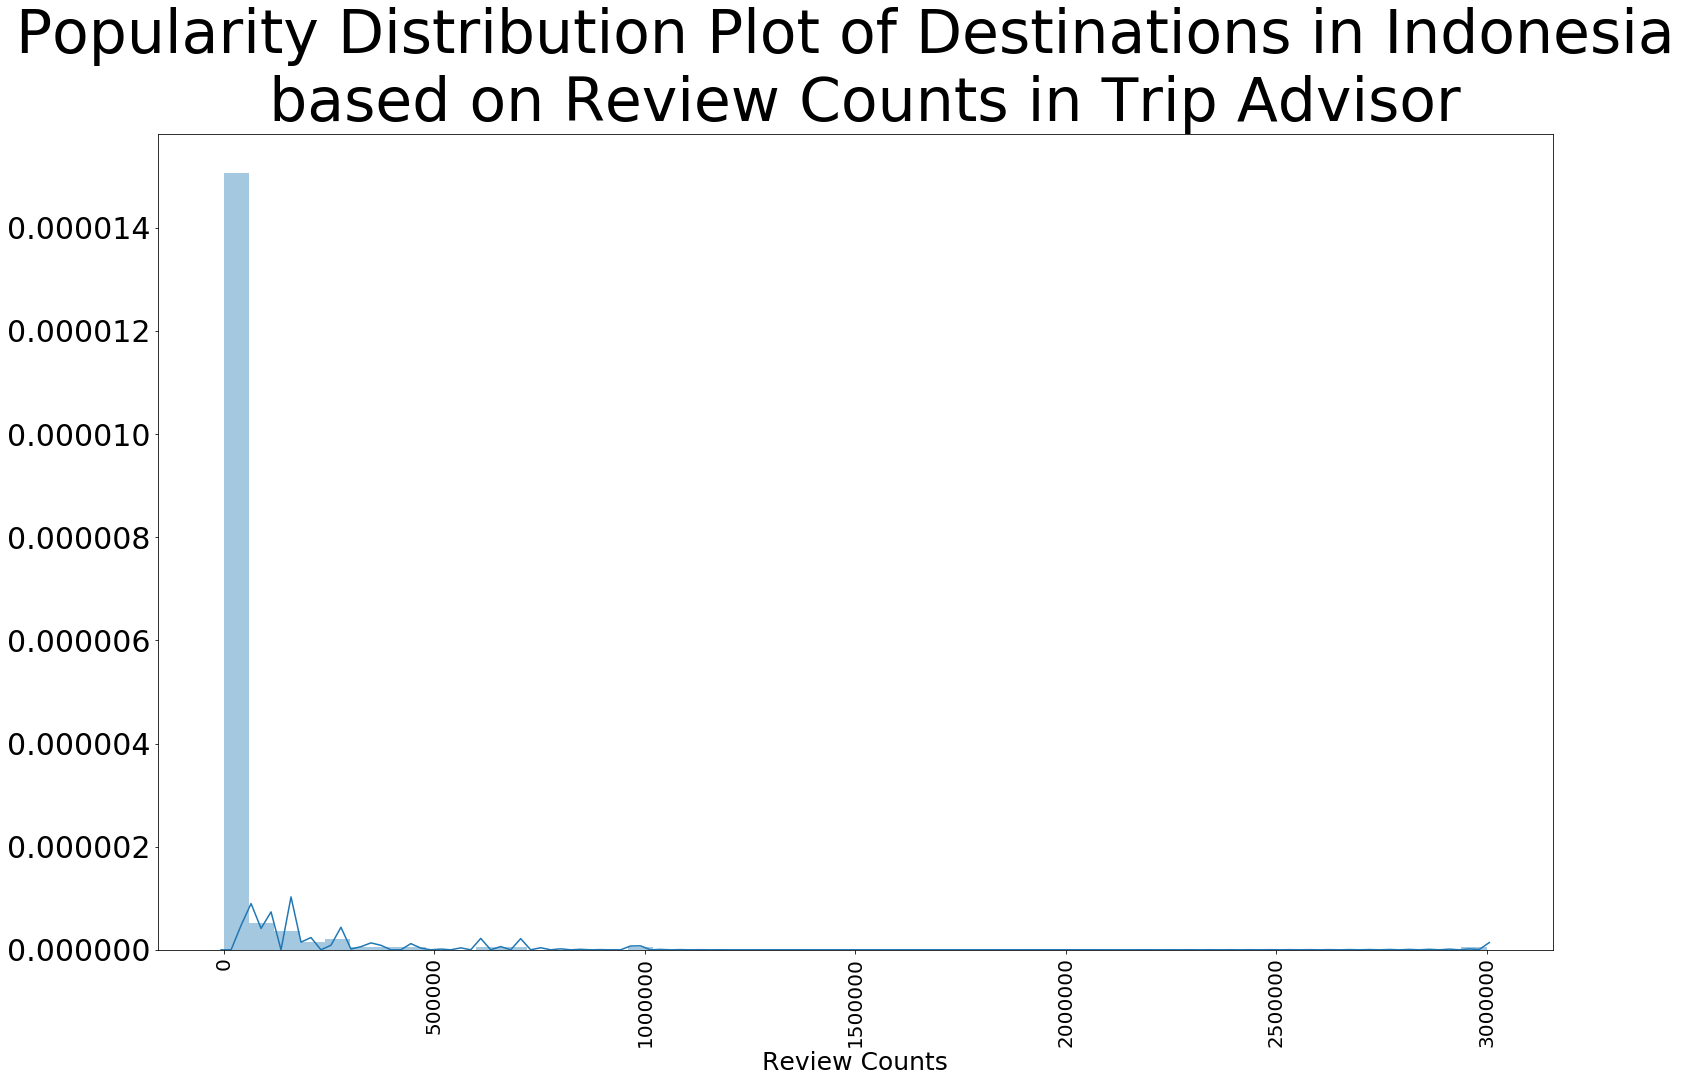

In [168]:
import matplotlib
fig=plt.figure(figsize=(25,15))
# plt.font
sns.distplot(df1["Review Count"])
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=20)
matplotlib.rc("ytick",labelsize=20)
plt.xlabel('Review Counts',fontsize=25)
plt.title("Popularity Distribution Plot of Destinations in Indonesia \n based on Review Counts in Trip Advisor", fontsize=60)
fig.savefig("popdist.png")